This notebook is heavily inspired by [link](https://www.youtube.com/watch?v=UO699Szp82M&ab_channel=Rabbitmetrics)

Link to the data: https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

In [16]:
import os
import json
import gzip
import pandas as pd
import seaborn as sns

In [ ]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

In [4]:
# Extract data from files
data = []
with gzip.open('./data/AMAZON_FASHION.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
        
metadata = []
with gzip.open('./data/meta_AMAZON_FASHION.json.gz') as f:
    for l in f:
        metadata.append(json.loads(l.strip()))

In [7]:
df = pd.DataFrame.from_dict(data)
df = df[df['reviewText'].notna()]
display(df.head(3))

df_meta=pd.DataFrame.from_dict(metadata)
display(df_meta.head(3))

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN


,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),[Product Dimensions:\n \n8....,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,[Package Dimensions:\n \n8....,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[For the professional or amateur magician. Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# the longest and the shortest reviewText column strings
print(df['reviewText'].str.len().min())
print(df['reviewText'].str.len().max())

1
10565


<Axes: xlabel='reviewText', ylabel='Count'>

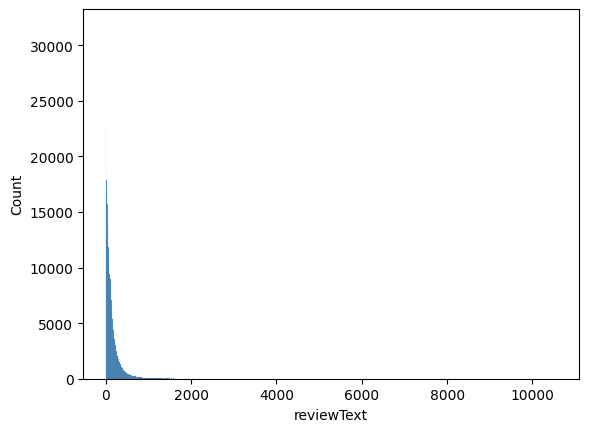

In [19]:
# we see that the majority of reviews below 500 symbols, lets truncate the reviews accordingly
string_lengths = df['reviewText'].str.len()
sns.histplot(string_lengths, kde=False)

<Axes: xlabel='truncated_reviews', ylabel='Count'>

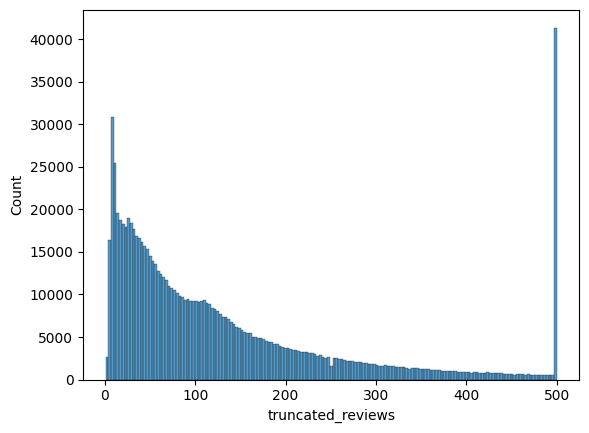

In [20]:
max_review_len = 500

def truncate_review(text):
    return text[:max_review_len]

df['truncated_reviews'] = df.apply(lambda row: truncate_review(row['reviewText']), axis=1)
sns.histplot(df['truncated_reviews'].str.len())

In [21]:
df.groupby('asin').count().sort_values('overall')

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,truncated_reviews
asin,,,,,,,,,,,,
0764443682,1,1,1,1,1,1,1,1,0,0,0,1
B019YM0O28,1,1,1,1,1,1,1,1,0,0,0,1
B019YME2N0,1,1,1,1,1,1,1,1,0,0,0,1
B019YMNS08,1,1,1,1,1,1,1,1,0,0,0,1
B00S7N99AY,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
B000PHANNM,2566,2566,2566,2566,2566,2566,2563,2566,85,2563,112,2566
B00RLSCLJM,3633,3633,3633,3633,3633,3633,3632,3633,225,3538,210,3633
B00I0VHS10,3884,3884,3884,3884,3884,3884,3880,3884,128,3872,107,3884


In [23]:
# Work on only a slice of the dataframe
df = df.loc[df['asin'] == 'B000KPIHQ4'].copy()
print(df.shape)
display(df.head(3))

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,truncated_reviews
11218,3.0,True,"09 26, 2007",A1CIM0XZ3UA926,B000KPIHQ4,M. Cane,"Good price, good product. Howver, it is generi...",Orthotics off the rack,1190764800,2,"{'Size Name:': ' Men's 5-5.5, Women's 7-7.5', ...",NaN,"Good price, good product. Howver, it is generi..."
11219,5.0,True,"01 18, 2007",A1EVVPCWRW5YYZ,B000KPIHQ4,Deborah Morris,My husband rates these insoles a 5 for comfort...,Very comfortable,1169078400,3,"{'Size Name:': ' Men's 10-10.5, Women's 12', '...",NaN,My husband rates these insoles a 5 for comfort...
11220,5.0,True,"05 18, 2018",A2P3NZ9H4PANK0,B000KPIHQ4,Stephanie,I have worn the Powerstep Pinnacle shoe insole...,... Pinnacle shoe insoles for the past 5 years...,1526601600,NaN,"{'Size Name:': ' Men's 6-6.5, Women's 8-8.5', ...",NaN,I have worn the Powerstep Pinnacle shoe insole...


### Embeddings 
Create embedding vectors from these reviews (both OpenAI and HuggFace are valid options)

In [24]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.embeddings import HuggingFaceEmbeddings

open_ai_emb = OpenAIEmbeddings(model_name="ada")
hugg_face_emb = HuggingFaceEmbeddings()

/opt/anaconda3/envs/langchain-sandbox/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
df['embeddings'] = df.apply(lambda row: hugg_face_emb.embed_query(row['truncated_reviews']), axis=1)
display(df.head(3))

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,truncated_reviews,embeddings
11218,3.0,True,"09 26, 2007",A1CIM0XZ3UA926,B000KPIHQ4,M. Cane,"Good price, good product. Howver, it is generi...",Orthotics off the rack,1190764800,2,"{'Size Name:': ' Men's 5-5.5, Women's 7-7.5', ...",NaN,"Good price, good product. Howver, it is generi...","[-0.00786147266626358, -0.00678030401468277, -..."
11219,5.0,True,"01 18, 2007",A1EVVPCWRW5YYZ,B000KPIHQ4,Deborah Morris,My husband rates these insoles a 5 for comfort...,Very comfortable,1169078400,3,"{'Size Name:': ' Men's 10-10.5, Women's 12', '...",NaN,My husband rates these insoles a 5 for comfort...,"[-0.0724727064371109, 0.01673395186662674, -0...."
11220,5.0,True,"05 18, 2018",A2P3NZ9H4PANK0,B000KPIHQ4,Stephanie,I have worn the Powerstep Pinnacle shoe insole...,... Pinnacle shoe insoles for the past 5 years...,1526601600,NaN,"{'Size Name:': ' Men's 6-6.5, Women's 8-8.5', ...",NaN,I have worn the Powerstep Pinnacle shoe insole...,"[-0.06397589296102524, 0.012907407246530056, -..."


In [35]:
# let learn the length of each embedding - 768. We will use it later to define pinecode vector database index
list_length = [len(lst) for lst in df['embeddings']]
print(max(list_length))
print(min(list_length))
emb_length = max(list_length)

768
768


In [29]:
# Use embedding vectors of the reviews as features and overall rating as a target 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    list(df.embeddings.values),
    df.overall,
    test_size = 0.2,
    random_state=17
)


rf_model = RandomForestRegressor(n_estimators=150)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mean_absolute_error(y_test, y_pred)

0.5635913985543312

Combining Vector Stores and LLM
Lets store the embeddings in vectore database

In [30]:
# Now we would use LLM to access Vector store and give the summary of reviews

import pinecone
from langchain.vectorstores import Pinecone

pinecone.init(
    api_key=os.getenv('PINECONE_API_KEY'),
    environment=os.getenv('PINECONE_ENV')
)

In [37]:
# we need to create an index first; use the lenght of embedding as a dimension
index_name = "cx-analytics"
pinecone.create_index(index_name, dimension=emb_length)

In [39]:
vec_texts = df['truncated_reviews'].tolist()
vec_store = Pinecone.from_texts(vec_texts, hugg_face_emb, index_name='cx-analytics')

In [40]:
# get a basic vector similarity search
query = "The quality is not that great"
result = vec_store.similarity_search(query)
print(result)

[Document(page_content='Acceptable quality. No issues', metadata={}), Document(page_content='Low quality but sometimes you get what you pay for.', metadata={}), Document(page_content='Quality is everything!', metadata={}), Document(page_content='As good as I hoped for..great quality.', metadata={})]


In [41]:
# get a basic vector similarity search
query = "The quality is incredible"
result = vec_store.similarity_search(query)
print(result)

[Document(page_content='Quality is everything!', metadata={}), Document(page_content='Does the job and good quality.', metadata={}), Document(page_content='Acceptable quality. No issues', metadata={}), Document(page_content='As good as I hoped for..great quality.', metadata={})]


In [47]:
# import RetrievalQA that is used to retrieve most relevant reviews given the promt and feed those to Language model
# info: https://docs.langchain.com/docs/components/chains/index_related_chains
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(model_name="gpt-3.5-turbo",temperature=0.0)
review_chain = RetrievalQA.from_chain_type(llm=chat, chain_type="stuff", retriever=vec_store.as_retriever())

In [48]:
# define the task for ChatGpt-3.5 turbo
question = """
The reviews you see are for a product called 'Powerstep Pinnacle Orthotic Shoe Insoles'.
What is the overall impression of these reviews? Give most prevalent examples in bullets. 
What do you suggest we focus on improving?
"""

result=review_chain.run(question)
print(result)

Overall, the reviews for Powerstep Pinnacle Orthotic Shoe Insoles are positive. Here are some prevalent examples:

Positive:
- Helped with plantar fasciitis
- Comfortable
- Durable
- Good for moderate support
- Easy to use
- Good value for the price

Negative:
- Not effective for some users
- Too high of an arch for some users

Based on the reviews, it seems that the product is generally effective and comfortable for most users. However, some users found the arch support to be too high. It may be worth exploring ways to adjust the arch support to better fit the needs of different users.


### Filtered Vector Similarity Search
The idea is to get all the reviews of a given rating that matched a specific theme.
We need to filter metadata for that

In [49]:
# Rename columns in dataframe and create meta data field in order to do upserts with Pinecone's Python client directly
# we are using pinecode directly since langchain does not seem to support this punctionality yet
df = df.rename(columns={'embeddings':'values','reviewerID':'id'})
df['metadata'] = df.apply(lambda row: dict(rating=row['overall']), axis=1)

In [50]:
# Create two copies of data, one for the upsert and one for extracting reviewText from ids return from the filtered similarity search

data = df[['metadata','values','id']].to_dict(orient='records')
data_local = df[['metadata','values','reviewText','id']].to_dict(orient='records')

In [52]:
# remove the index since free version of Pinecode allows only one index to be stored
index_name = "cx-analytics"
pinecone.delete_index(index_name)

In [53]:
# create the Pinecone index
pinecone.create_index(name='filtered', 
                      metric='euclidean', 
                      dimension=emb_length)
index = pinecone.Index('filtered')

In [54]:
from tqdm.auto import tqdm

for i in tqdm(range(0, len(data), 50)):
    j= i + 50
    if j > len(data):
        j = len(data)
    batch = data[i: j]
    index.upsert(vectors=batch)

100%|██████████| 88/88 [03:42<00:00,  2.52s/it]


In [55]:
# Run a filtered similarity search
query = hugg_face_emb.embed_query("will buy again")
results = index.query(queries=[query], top_k=100, filter={'rating': {'$eq': 4.0}})
print(results)

{'results': [{'matches': [{'id': 'A3FPSS57Q9222K',
                           'score': 0.433359027,
                           'values': []},
                          {'id': 'A2CFLF1PMS494J',
                           'score': 0.784576297,
                           'values': []},
                          {'id': 'A1TYQAI0YC8B0I',
                           'score': 0.822275758,
                           'values': []},
                          {'id': 'A1EZTNN9S1VC8V',
                           'score': 1.01505554,
                           'values': []},
                          {'id': 'ANZQMUPAH06T7',
                           'score': 1.0533241,
                           'values': []},
                          {'id': 'A1RCFWUHLGHMS4',
                           'score': 1.05466151,
                           'values': []},
                          {'id': 'A2ECI8FJ8GYO77',
                           'score': 1.05466151,
                           'values': []},
            

In [56]:
# get the rating from id
get_rating_from_id = {
    x['id']: {
        'rating': x['metadata']['rating'],
        'review': x['reviewText'],
    } for x in data_local}

In [57]:
def review_and_rating(embeddings, 
                      query,
                      rating)-> pd.DataFrame:
    
    query=embeddings.embed_query(query)
    results = index.query(queries=[query], top_k=100, filter={'rating': {'$eq': rating}})
    ids = [i['id'] for i in results['results'][0]['matches']]
    l = []
    
    for i in ids:
        l.append(get_rating_from_id[i])
    
    return pd.DataFrame(l)

In [59]:
repurchase_list = review_and_rating(hugg_face_emb, 'will purchase again', 5.0)
winback = review_and_rating(hugg_face_emb, 'disappointed', 1.0)

In [60]:
repurchase_list

,rating,review
0,5.0,Would buy again
1,5.0,"Good service, will buy again"
2,5.0,Happy with my purchase
3,5.0,Happy with purchase
4,5.0,"Great Item, I will be it buying again!"
...,...,...
95,5.0,As described. Good Transaction.
96,5.0,Excellent service and size was great.
97,5.0,Nice product and quick delivery
98,5.0,Great product.
